# STAGE CLASSIFICATION OF LIVER CANCER

## INTRODUCTION

CANCER is one among the life threatening diseases in the present world. A potential research is being carried out for its cure and detection. Coming to this task, it is a binary classification problem in which the class "-1" indicate intial stage of cancer whereas +1 indicate the advanced stage. The data has huge count of features which is 60,483 per sample. This 60,483 length sample indicate the RNA expression of a human. So, our task here is to predict the infection stage of the patient (already given that he is cancerous) given his RNA expression.

## DATASET DESCRIPTION

* The amount of data available is too low. As a part of training data we are provided with just 279 samples each of length 60,483.
* As a part of test data we are given to predict the labels of 71 samples.

## EVALUATION METRIC USED

* ROC_AUC

## METHODOLOGY

* Read both training and test datasets into respective pandas dataframes.
* Re-arranged the data by deleting unneccessary columns and also seperated out training labels from that samples.
* Normalized both train and test samples.
* Performed Feature Selection thus extracting top-100 features using "SelectKBest" technique.
* Applied Logistic Regression, SVM, Bagging, Adaboost, Gradient boosting classifiers which are fine tuned using GridSearchCV with 5-fold cross validation.
* Final predictions are considered by applying voting on top-3 performing classifiers.

## FINAL RESULT ON TEST DATA (KAGGLE COMPETITION)

* ROC_AUC on Test Data = 0.72500 (Among top-15 in total of 150+ submissions)

## IMPORTING ALL THE REQUIRED MODULES

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from statistics import mode
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

## READING THE TRAINING DATA

In [12]:
x_data = pd.read_csv("E:\\1. MTECH\\SEM-2\\BDMH\\ASSIGNMENT-2\\train.csv")
print("DIMENSIONS OF THE DATA::",x_data.shape)

DIMENSIONS OF THE DATA:: (279, 60485)


## READING THE TEST DATA

In [16]:
data_test = pd.read_csv("E:\\1. MTECH\\SEM-2\\BDMH\\ASSIGNMENT-2\\test.csv")
print("DIMENSIONS OF TEST DATA::",data_test.shape)

DIMENSIONS OF TEST DATA:: (71, 60484)


## DISPLAYING THE DATA

In [13]:
x_data.head(2)

,id,Label,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,TCGA-2V-A95S-01A,-1,1.3226,0.000000,2.60713,0,1.411440,3.27352,0,0.006410,...,0,2.710970,0.0,0.435580,0.000000,3.90541,0.017601,0,1.708020,0.0
1,TCGA-2Y-A9GU-01A,1,0.0000,0.006431,1.49737,0,0.598584,2.39426,0,0.006599,...,0,0.812853,0.0,0.208534,0.147081,4.05334,0.368102,0,0.182464,0.0


## DROPPING "ID" COLUMN AND SEPERATING OUT "LABELS" COLUMN FROM "x_data"

In [14]:
del x_data['id']
y_data = x_data['Label']
del x_data['Label']
print("Shape of x_data::",x_data.shape)
print("Shape of y_data::",y_data.shape)

Shape of x_data:: (279, 60483)
Shape of y_data:: (279,)


## DELETING "ID" COLUMN FROM TEST DATA

In [17]:
del  data_test['id']
print("shape of test data::",data_test.shape)

shape of test data:: (71, 60483)


## NORMALIZING THE DATA

In [18]:
norm = Normalizer()
x_train_norm = norm.fit_transform(x_data)
x_test_norm = norm.transform(data_test)
print("Shape of x_train_norm::",x_train_norm.shape)
print("Shape of x_test_norm::",x_test_norm.shape)

Shape of x_train_norm:: (279, 60483)
Shape of x_test_norm:: (71, 60483)


## COUNT OF CLASS-WISE LABELS IN TRAINING SET

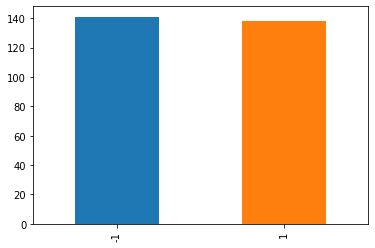

In [19]:
y_data.value_counts().plot("bar")
plt.show()

In [20]:
y_data.value_counts()

-1    141
 1    138
Name: Label, dtype: int64

## PERFORMING FEATURE EXTRACTION

In [21]:
from sklearn.feature_selection import SelectKBest

top_k = SelectKBest(k=100)

x_train_norm_top = top_k.fit_transform(x_train_norm,y_data)

x_test_norm_top = top_k.transform(x_test_norm)

x_train_norm_top.shape,x_test_norm_top.shape

((279, 100), (71, 100))

# APPLYING LOGISTIC REGRESSION CLASSIFIER

### PARAMETER TUNING USING GRIDSEARCH CV WITH 5-FOLD CROSS VALIDATION

In [35]:
parameters = {'penalty':("l2","l1","elasticnet","none"),'C':[100,101,102,103,104,105,106,107,108,109]}
logistic = LogisticRegression(solver="liblinear")
clf = GridSearchCV(logistic,parameters,scoring = 'roc_auc',cv=5)
clf.fit(x_train_norm_top,y_data)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [100, 101, 102, 103, 104, 105, 106, 107, 108,
                               109],
                         'penalty': ('l2', 'l1', 'elasticnet', 'none')},
             scoring='roc_auc')

### BEST ESTIMATOR FOR LOGISTIC REGRESSION

In [36]:
clf.best_params_,clf.best_score_

({'C': 105, 'penalty': 'l2'}, 0.7290985742956186)

### TRAINING ON BEST PARAMTERS

In [37]:
logistic = LogisticRegression(C = 105,penalty = "l2",solver="liblinear")
logistic.fit(x_train_norm_top,y_data)
pred_logistic = list(logistic.predict(x_test_norm_top))

### TEST DATA PREDICTIONS USING LOGISTIC REGRESSION

In [42]:
print(pred_logistic,end=" ")

[1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1] 71


# APPLYING SVM CLASSIFIER

### PARAMETER TUNING UISNG GRIDSEARCHCV WITH 5-FOLD CROSS VALIDATION

In [50]:
parameters = {'C':[0.90,0.95,0.96,0.97,0.98,0.99,1,2,3,4,5,6,7,8,9],'kernel':['linear','rbf']}
svm = SVC(random_state=0)
clf = GridSearchCV(svm,parameters,scoring = 'roc_auc',cv=5)
clf.fit(x_train_norm_top,y_data)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1, 2, 3, 4, 5,
                               6, 7, 8, 9],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc')

### BEST ESTIMATOR FOR SVM

In [51]:
clf.best_params_,clf.best_score_

({'C': 0.99, 'kernel': 'rbf'}, 0.7324018687934943)

### TRAINING ON BEST PARAMETERS

In [57]:
svm = SVC(random_state=0,C=0.99,kernel='rbf')
svm.fit(x_train_norm_top,y_data)
print("Performance on Training Data::", svm.score(x_train_norm_top,y_data))
pred_svm = list(svm.predict(x_test_norm_top))

Performance on Training Data:: 0.7275985663082437


### TEST DATA PREDICTIONS USING SVM CLASSIFIER

In [58]:
print(pred_svm,end=" ")

[1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1] 

# APPLYING BAGGING CLASSIFIER WITH BASE ESTIMATOR AS DTREE

### PARAMETER TUNING USING GRIDSEARCHCV WITH 5-FOLD CROSS-VALIDATION

In [63]:
parameters = {'n_estimators':[1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100]}
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0,max_depth=25),random_state = 0)
clf = GridSearchCV(bagging,parameters,scoring='roc_auc',cv=5)
clf.fit(x_train_norm_top,y_data)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=25,
                                                                               random_state=0),
                                         random_state=0),
             param_grid={'n_estimators': [1000, 1010, 1020, 1030, 1040, 1050,
                                          1060, 1070, 1080, 1090, 1100]},
             scoring='roc_auc')

### BEST ESTIMATOR FOR BAGGING CLASSIFIER

In [64]:
clf.best_params_,clf.best_score_

({'n_estimators': 1020}, 0.76721775875101)

### TRAINING ON BEST PARAMETERS

In [66]:
bagging = BaggingClassifier(n_estimators=1020,base_estimator=DecisionTreeClassifier(random_state=0,max_depth=25),random_state=0)
bagging.fit(x_train_norm_top,y_data)
print("Performance on Training Data::", bagging.score(x_train_norm_top,y_data))
pred_bagging = list(bagging.predict(x_test_norm_top))

Performance on Training Data:: 1.0


### PREDICTIONS ON TEST DATA

In [67]:
print(pred_bagging,end=" ")

[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1] 

# APPLYING ADABOOST WITH BASE ESTIMATOR AS RBF SVM

### PARAMETER TUNING USING GRIDSEARCHCV WITH 5-FOLD CROSS-VALIDATION

In [71]:
svm_weak =  SVC(C=0.99,kernel="rbf",random_state=0,probability=True)
parameters = {'n_estimators':[3,4,5,6,7,8,9,10]}
adaboost = AdaBoostClassifier(base_estimator=svm_weak,random_state=0)
clf = GridSearchCV(adaboost,parameters,scoring='roc_auc',cv=5)
clf.fit(x_train_norm_top,y_data)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=SVC(C=0.99,
                                                             probability=True,
                                                             random_state=0),
                                          random_state=0),
             param_grid={'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

### BEST ESTIMATOR FOR ADABOOST CLASSIFIER

In [72]:
clf.best_params_,clf.best_score_

({'n_estimators': 3}, 0.7349737404540361)

### TRAINING ON BEST PARAMETERS

In [73]:
adaboost = AdaBoostClassifier(base_estimator=svm_weak,n_estimators =3 ,random_state=0)
adaboost.fit(x_train_norm_top,y_data)
print("Performance on Training Data::", adaboost.score(x_train_norm_top,y_data))
pred_adaboost = list(adaboost.predict(x_test_norm_top))

Performance on Training Data:: 0.7025089605734767


### PREDICTIONS ON TEST DATA

In [74]:
print(pred_adaboost,end=" ")

[1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1] 

# APPLYING GRADIENT BOOSTING CLASSIFIER

In [83]:
parameters = {'n_estimators':[90,91,92,93,94,95],'max_depth':[3,4,5,6]}
gradboost = GradientBoostingClassifier(random_state=0)
clf = GridSearchCV(gradboost,parameters,scoring='roc_auc',cv=5)
clf.fit(x_train_norm_top,y_data)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [90, 91, 92, 93, 94, 95]},
             scoring='roc_auc')

### BEST ESTIMATOR FOR GRADIENT BOOSTING CLASSIFIER

In [84]:
clf.best_params_,clf.best_score_

({'max_depth': 5, 'n_estimators': 90}, 0.7692066098470038)

### TRAINING ON BEST PARAMETERS

In [85]:
gradboost = GradientBoostingClassifier(max_depth=5,n_estimators=90,random_state=0)
gradboost.fit(x_train_norm_top,y_data)
print("Performance on Training Data::", gradboost.score(x_train_norm_top,y_data))
pred_gradboost = list(gradboost.predict(x_test_norm_top))

Performance on Training Data:: 1.0


In [86]:
print(pred_gradboost,end=" ")

[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1] 

# VOTING FOR TOP-3 PERFORMING CLASSIFIERS

In [101]:
test=[]
for i in range(len(x_test_norm_top)):
    test.append(mode([pred_bagging[i],pred_adaboost[i],pred_gradboost[i]]))

In [102]:
print(test,end=" ")

[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1] 

### WRITING TEST PREDICTIONS TO A CSV FILE

In [103]:
test_IDs=[]
for i in range(3001,3072):
    test_IDs.append(i)
final_preds = pd.DataFrame({'Id':test_IDs,'Label': test})
final_preds.to_csv ("C:\\Users\\Sai Kumar\\Desktop\\final_predictions_voting.csv",index=False,header=True)

### Reference:

1. Kaur, H., Bhalla, S., & Raghava, G. P. (2019). Classification of early and late stage liver hepatocellular carcinoma patients from their genomics and epigenomics profiles. PloS one, 14(9).